In [1]:
# !pip install pyproj
# !pip install geopandas
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point, Polygon

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Install rtree
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
import os
os.chdir('spatialindex-src-1.8.5')
!./configure
!make
!make install
!pip install rtree
!ldconfig
from rtree import index
from rtree.index import Rtree
p = index.Property()
idx = index.Index(properties=p)
idx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   692k      0 --:--:-- --:--:-- --:--:--  691k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [0]:
!pip install osmnx

     |████████████████████████████████| 71kB 2.7MB/s 


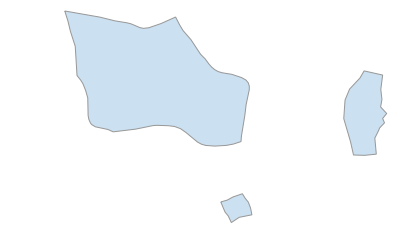

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f961e92ae48>)

In [0]:
import osmnx as ox
city = ox.gdf_from_place('Ulaanbaatar, Mongolia')
ox.plot_shape(ox.project_gdf(city))

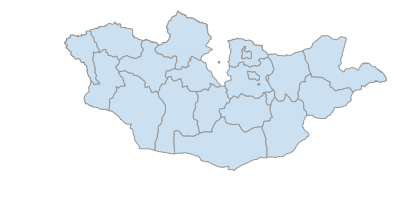

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f961e3e1e10>)

In [0]:
places = ox.gdf_from_places(['Bulgan, Mongolia', 'Selenge, Mongolia', 'Arkhangai, Mongolia', 'Khovsgol, Mongolia', 'Uvurkhangai, Mongolia', 'Dornod, Mongolia', 'Tov, Mongolia', 'Bayan Ulgii, Mongolia', 
                             'Uvs, Mongolia', 'Darkhan-uul, Mongolia', 'Darkhan-uul, Mongolia', 'Erdenet, Mongolia' 'Orkhon, Mongolia', 'Ulaanbaatar, Mongolia', 'Dornogovi, Mongolia', 'Omnogovi, Mongolia', 
                             'Sukhbaatar, Mongolia', 'Dundgovi, Mongolia', 'Khovd, Mongolia', 'Khentii, Mongolia', 'Bayankhongor, Mongolia', 'Govi altai, Mongolia', 'Zavkhan, Mongolia', 'Govisumber, Mongolia'])
places = ox.project_gdf(places)
# ox.save_gdf_shapefile(places)
ox.plot_shape(ox.project_gdf(places))

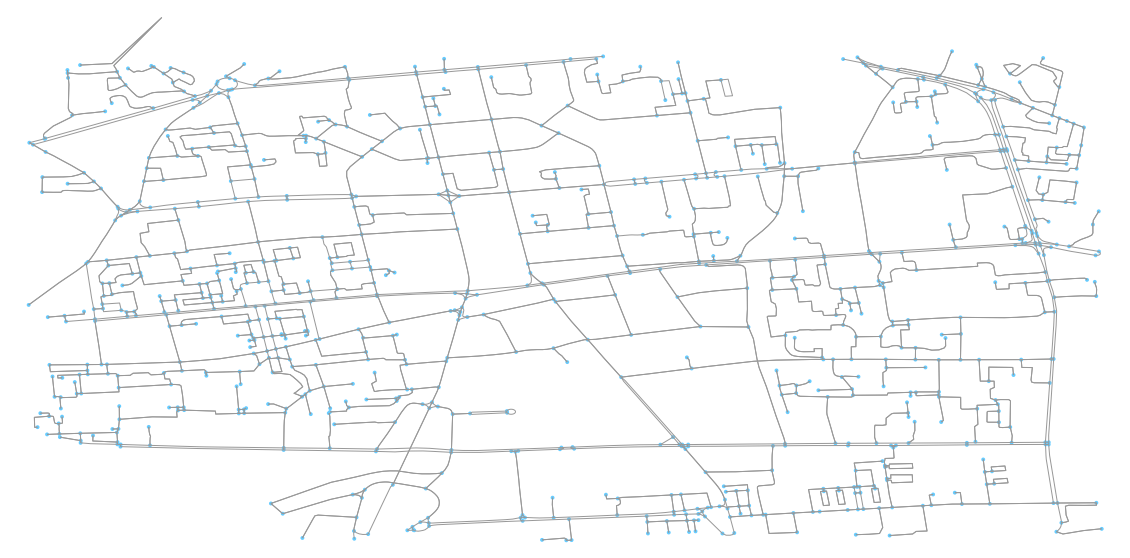

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9618aee0f0>)

In [0]:
G = ox.graph_from_bbox(47.9296, 47.9031, 106.9462, 106.8954, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected, fig_height=10, fig_width=20)

In [0]:
# 47.9653,106.8018


G = ox.graph_from_bbox(47.9653, 47.9031, 106.9462, 106.8018, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected, fig_height=30, fig_width=60)

Output hidden; open in https://colab.research.google.com to view.

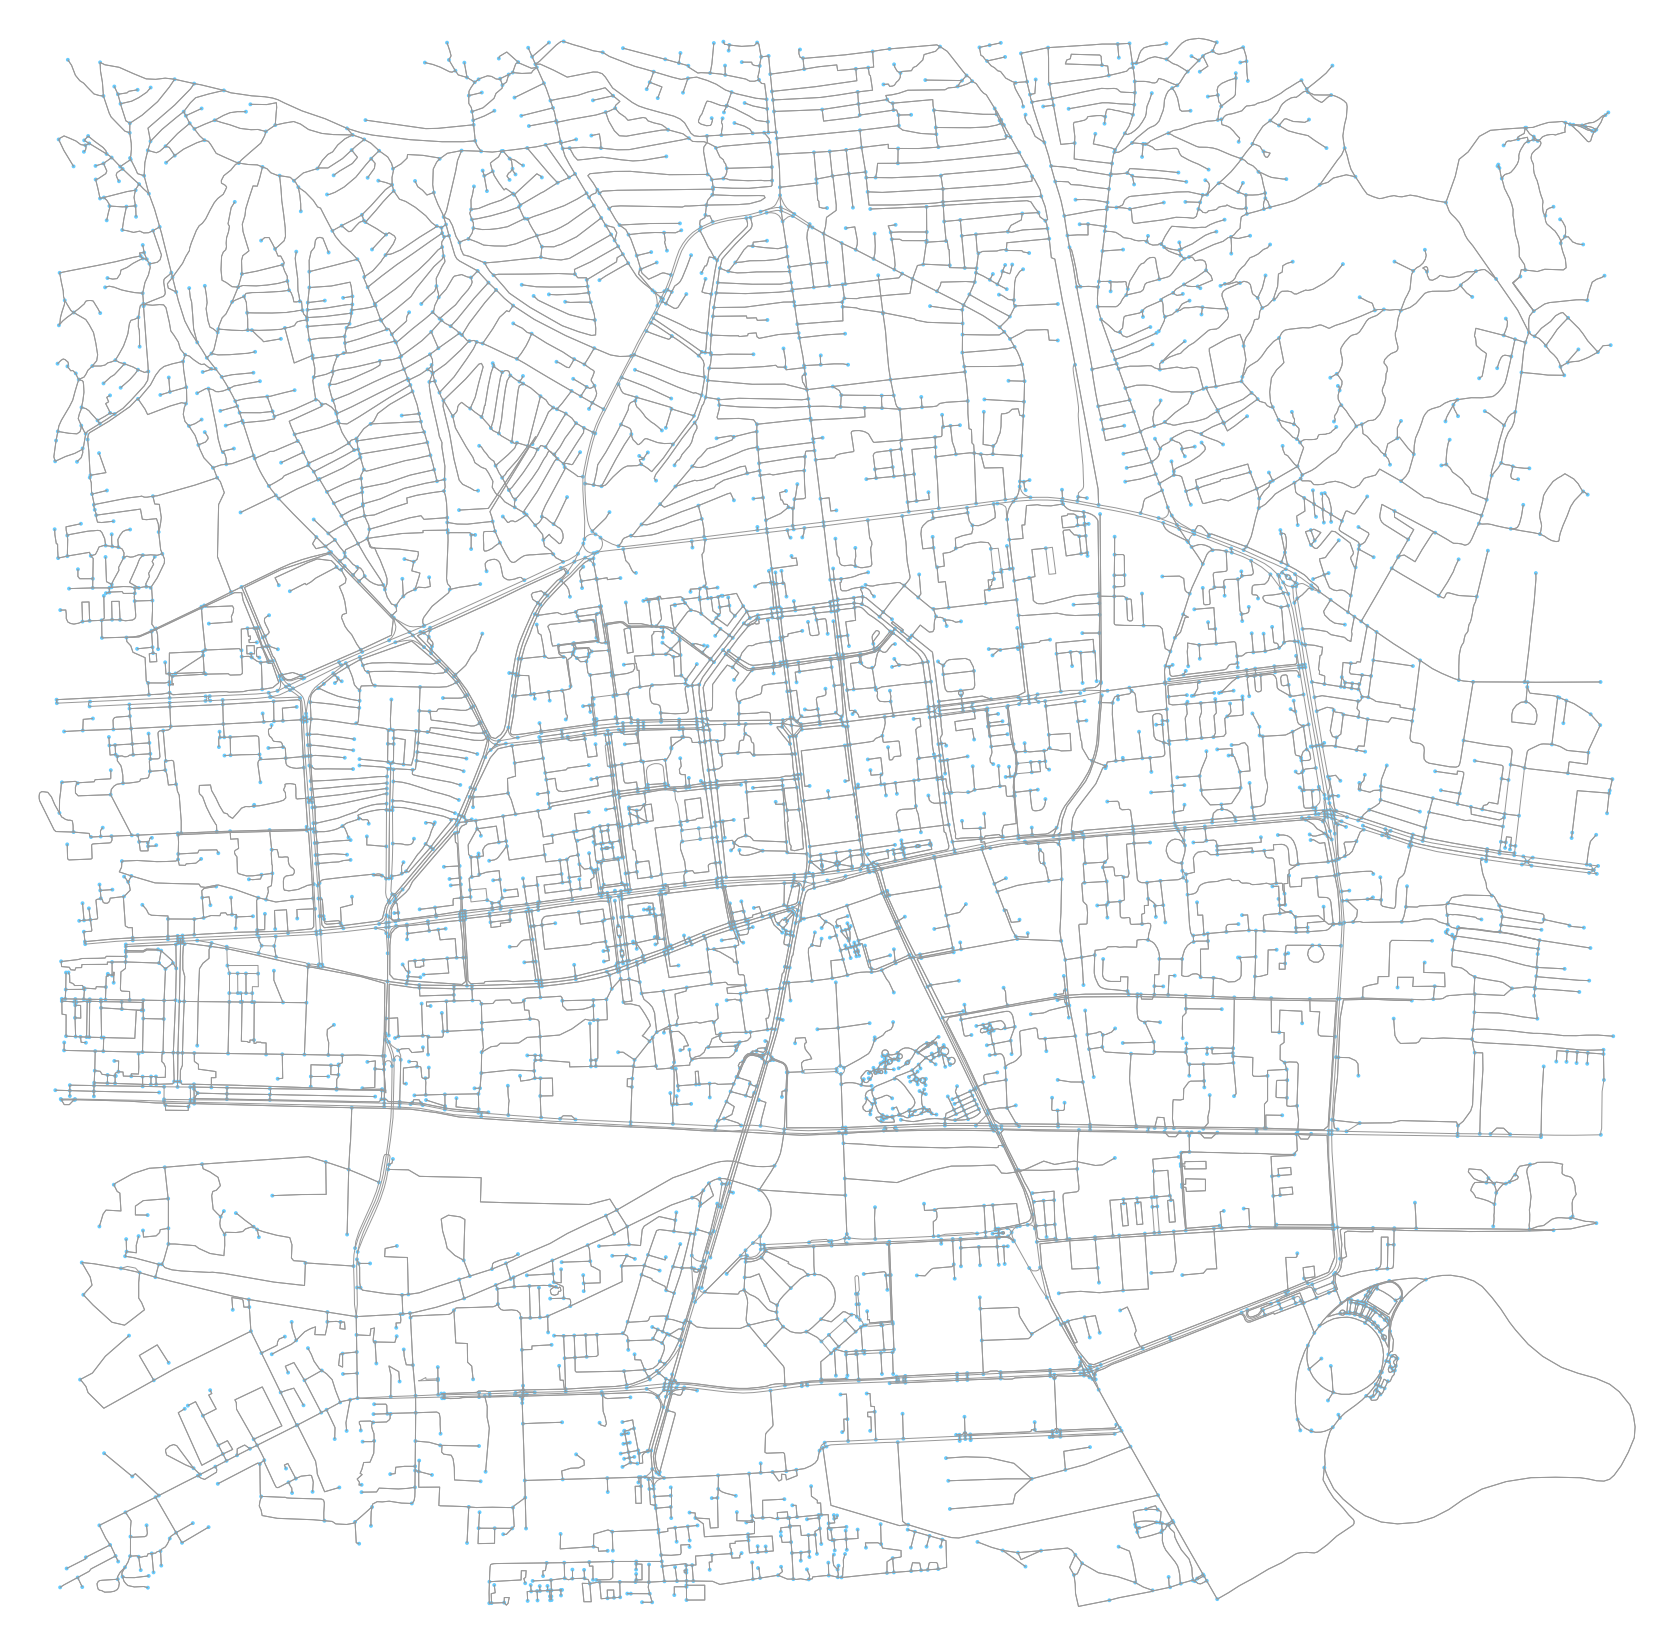

(<Figure size 4320x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f961c12aa90>)

In [0]:
G = ox.graph_from_point((47.91876,106.91773), distance=3000, network_type='all')
ox.plot_graph(G, fig_height=30, fig_width=60)

In [0]:
ox.basic_stats(G)

{'circuity_avg': 1.0953176338691863,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 82.5011047356384,
 'edge_length_total': 1226461.4230000007,
 'intersection_count': 4668,
 'intersection_density_km': None,
 'k_avg': 5.085000855139388,
 'm': 14866,
 'n': 5847,
 'node_density_km': None,
 'self_loop_proportion': 0.004372393380869097,
 'street_density_km': None,
 'street_length_avg': 82.66812875857742,
 'street_length_total': 662585.051999998,
 'street_segments_count': 8015,
 'streets_per_node_avg': 2.7540619120916707,
 'streets_per_node_counts': {0: 0,
  1: 1179,
  2: 2,
  3: 3772,
  4: 869,
  5: 22,
  6: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2016418676244228,
  2: 0.0003420557550880794,
  3: 0.6451171540961177,
  4: 0.14862322558577049,
  5: 0.003762613305968873,
  6: 0.000513083632632119}}

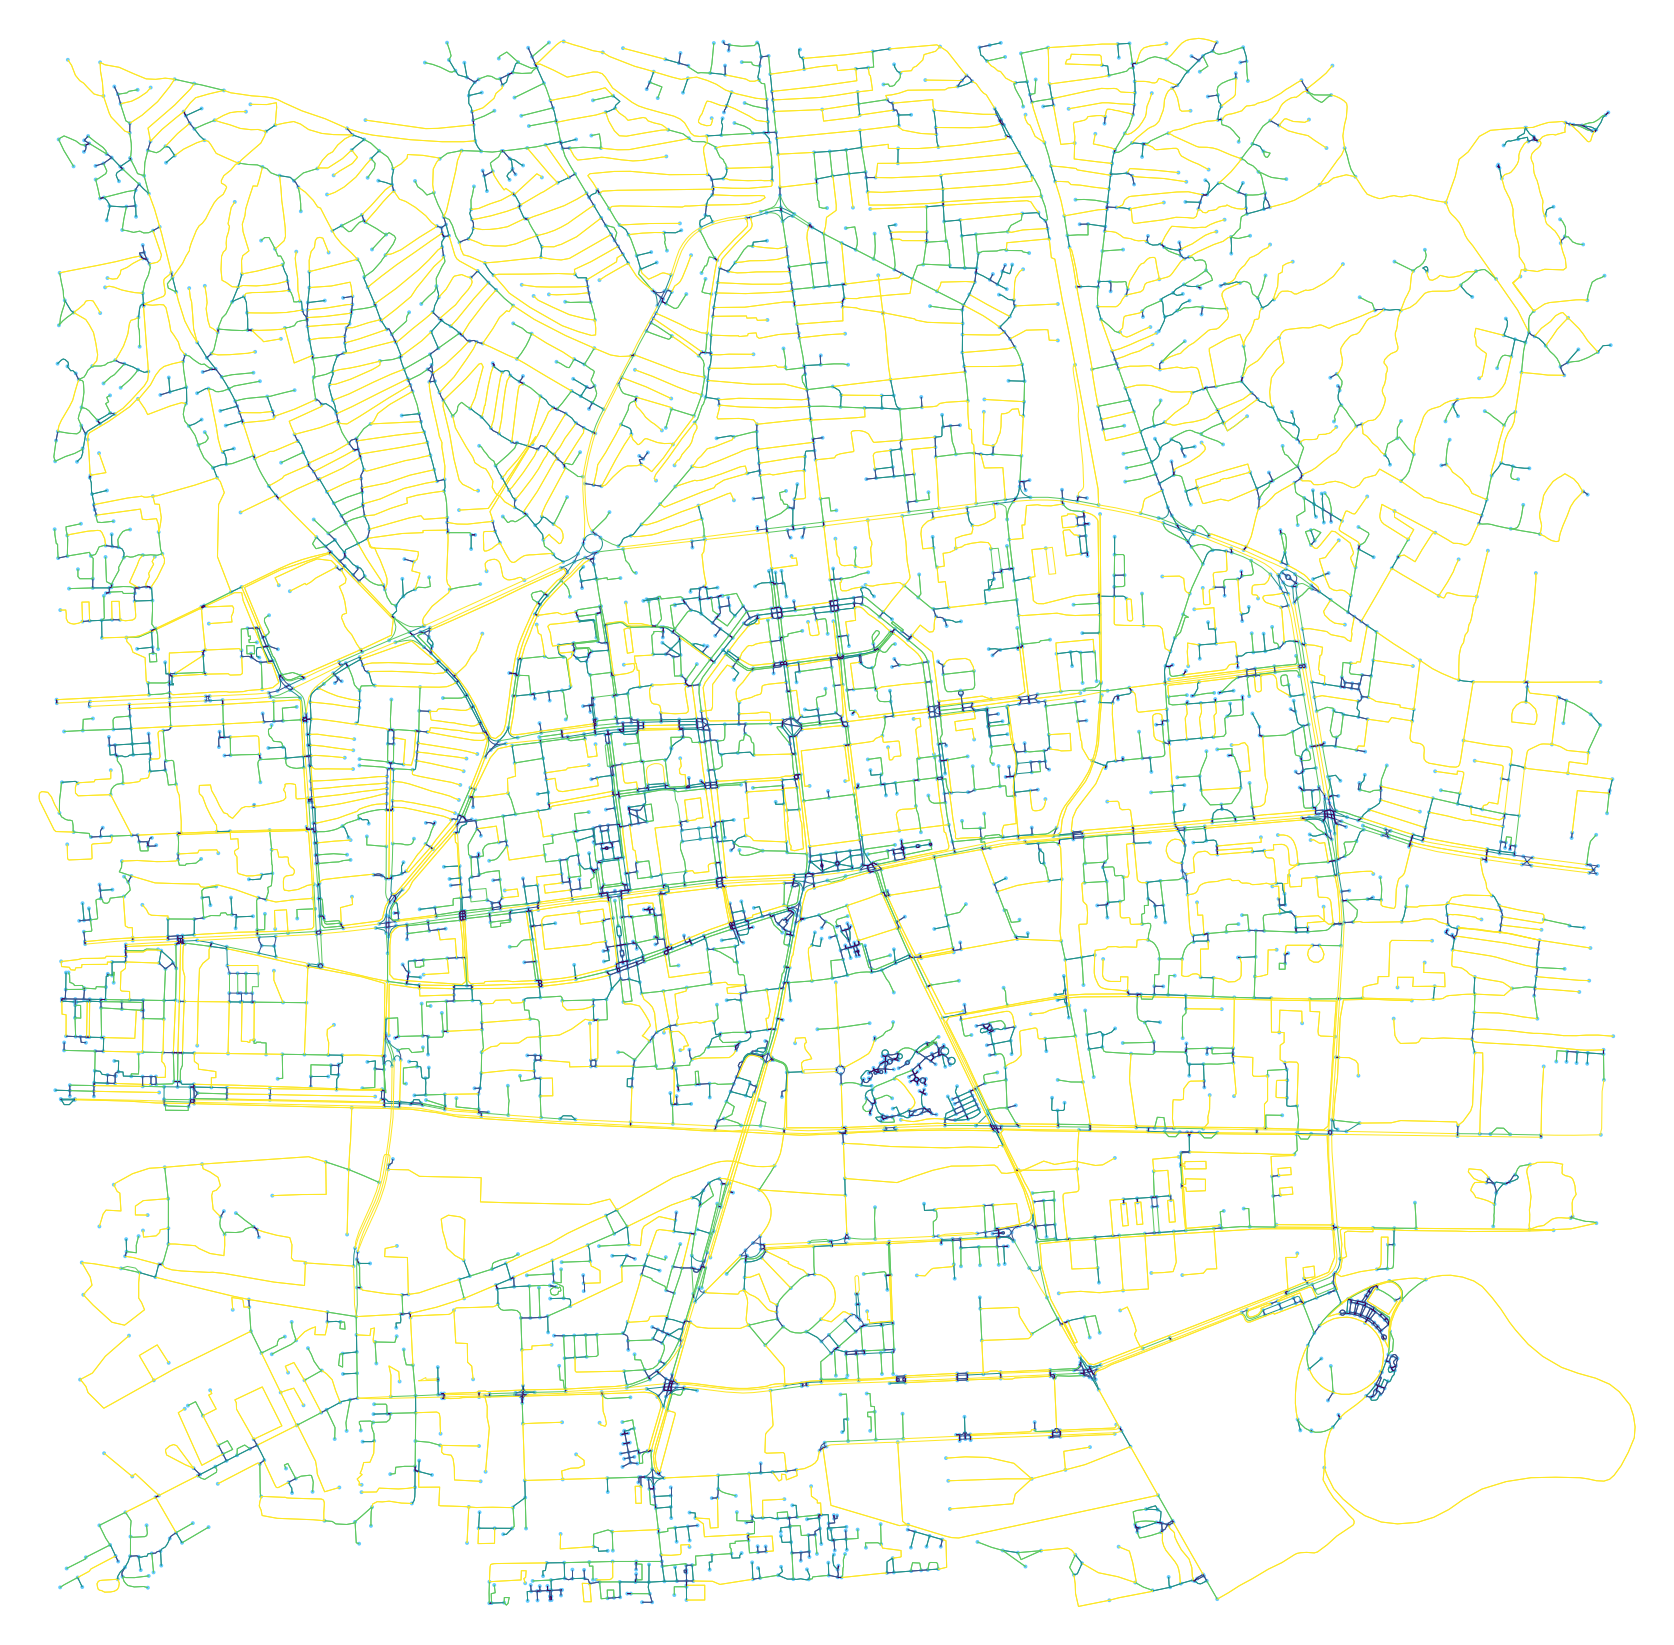

(<Figure size 4320x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f960e1faf98>)

In [0]:
ec = ox.get_edge_colors_by_attr(G, attr='length')
ox.plot_graph(G, edge_color=ec, fig_height=30, fig_width=60)

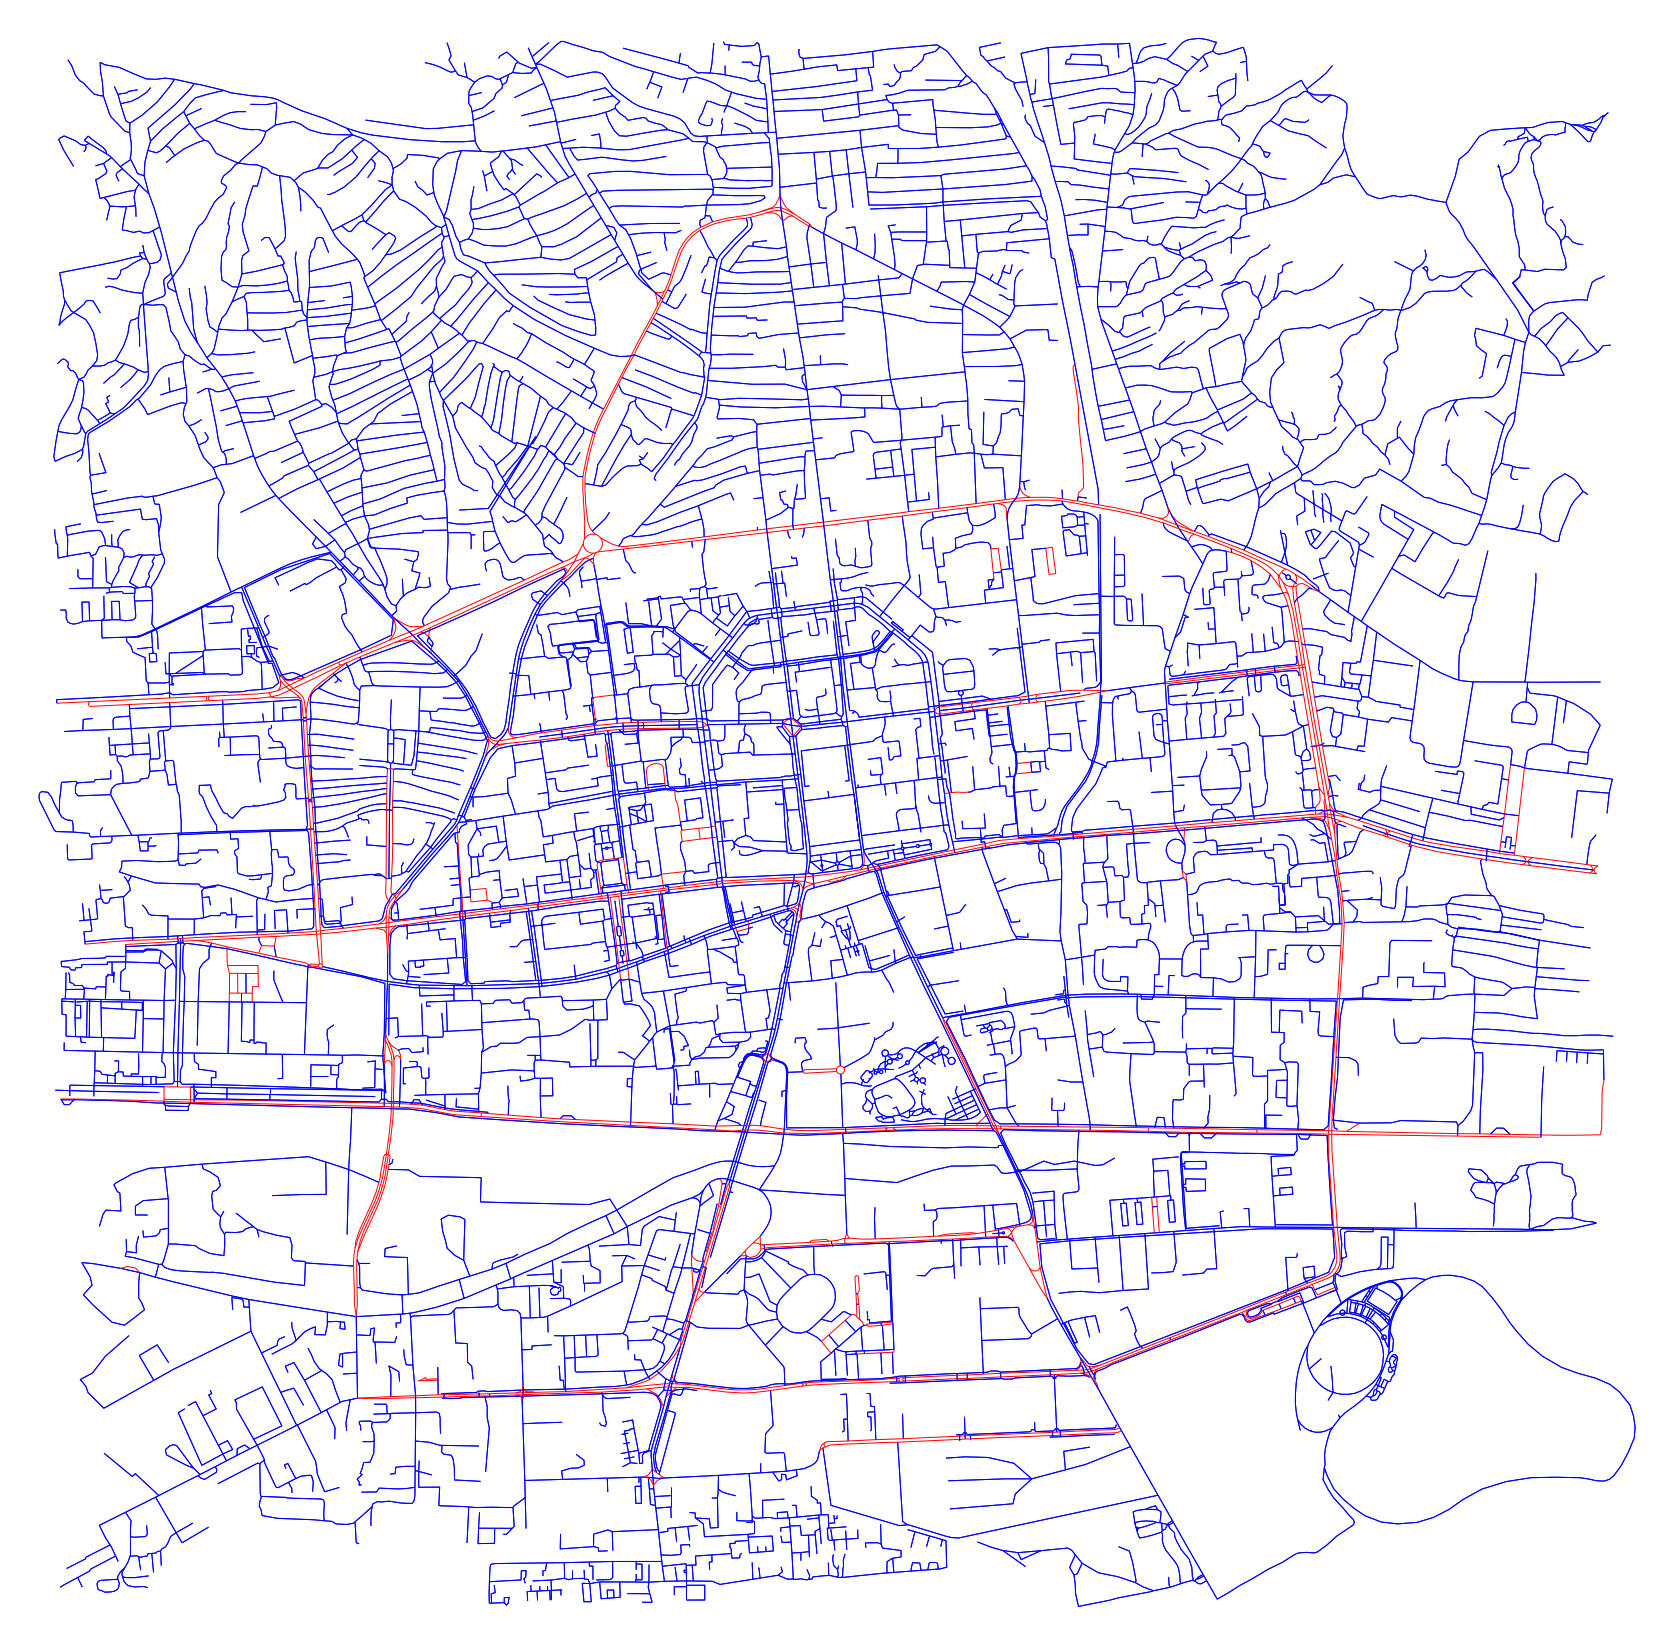

(<Figure size 4320x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f960e5dc780>)

In [0]:
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec, fig_height=30, fig_width=60)

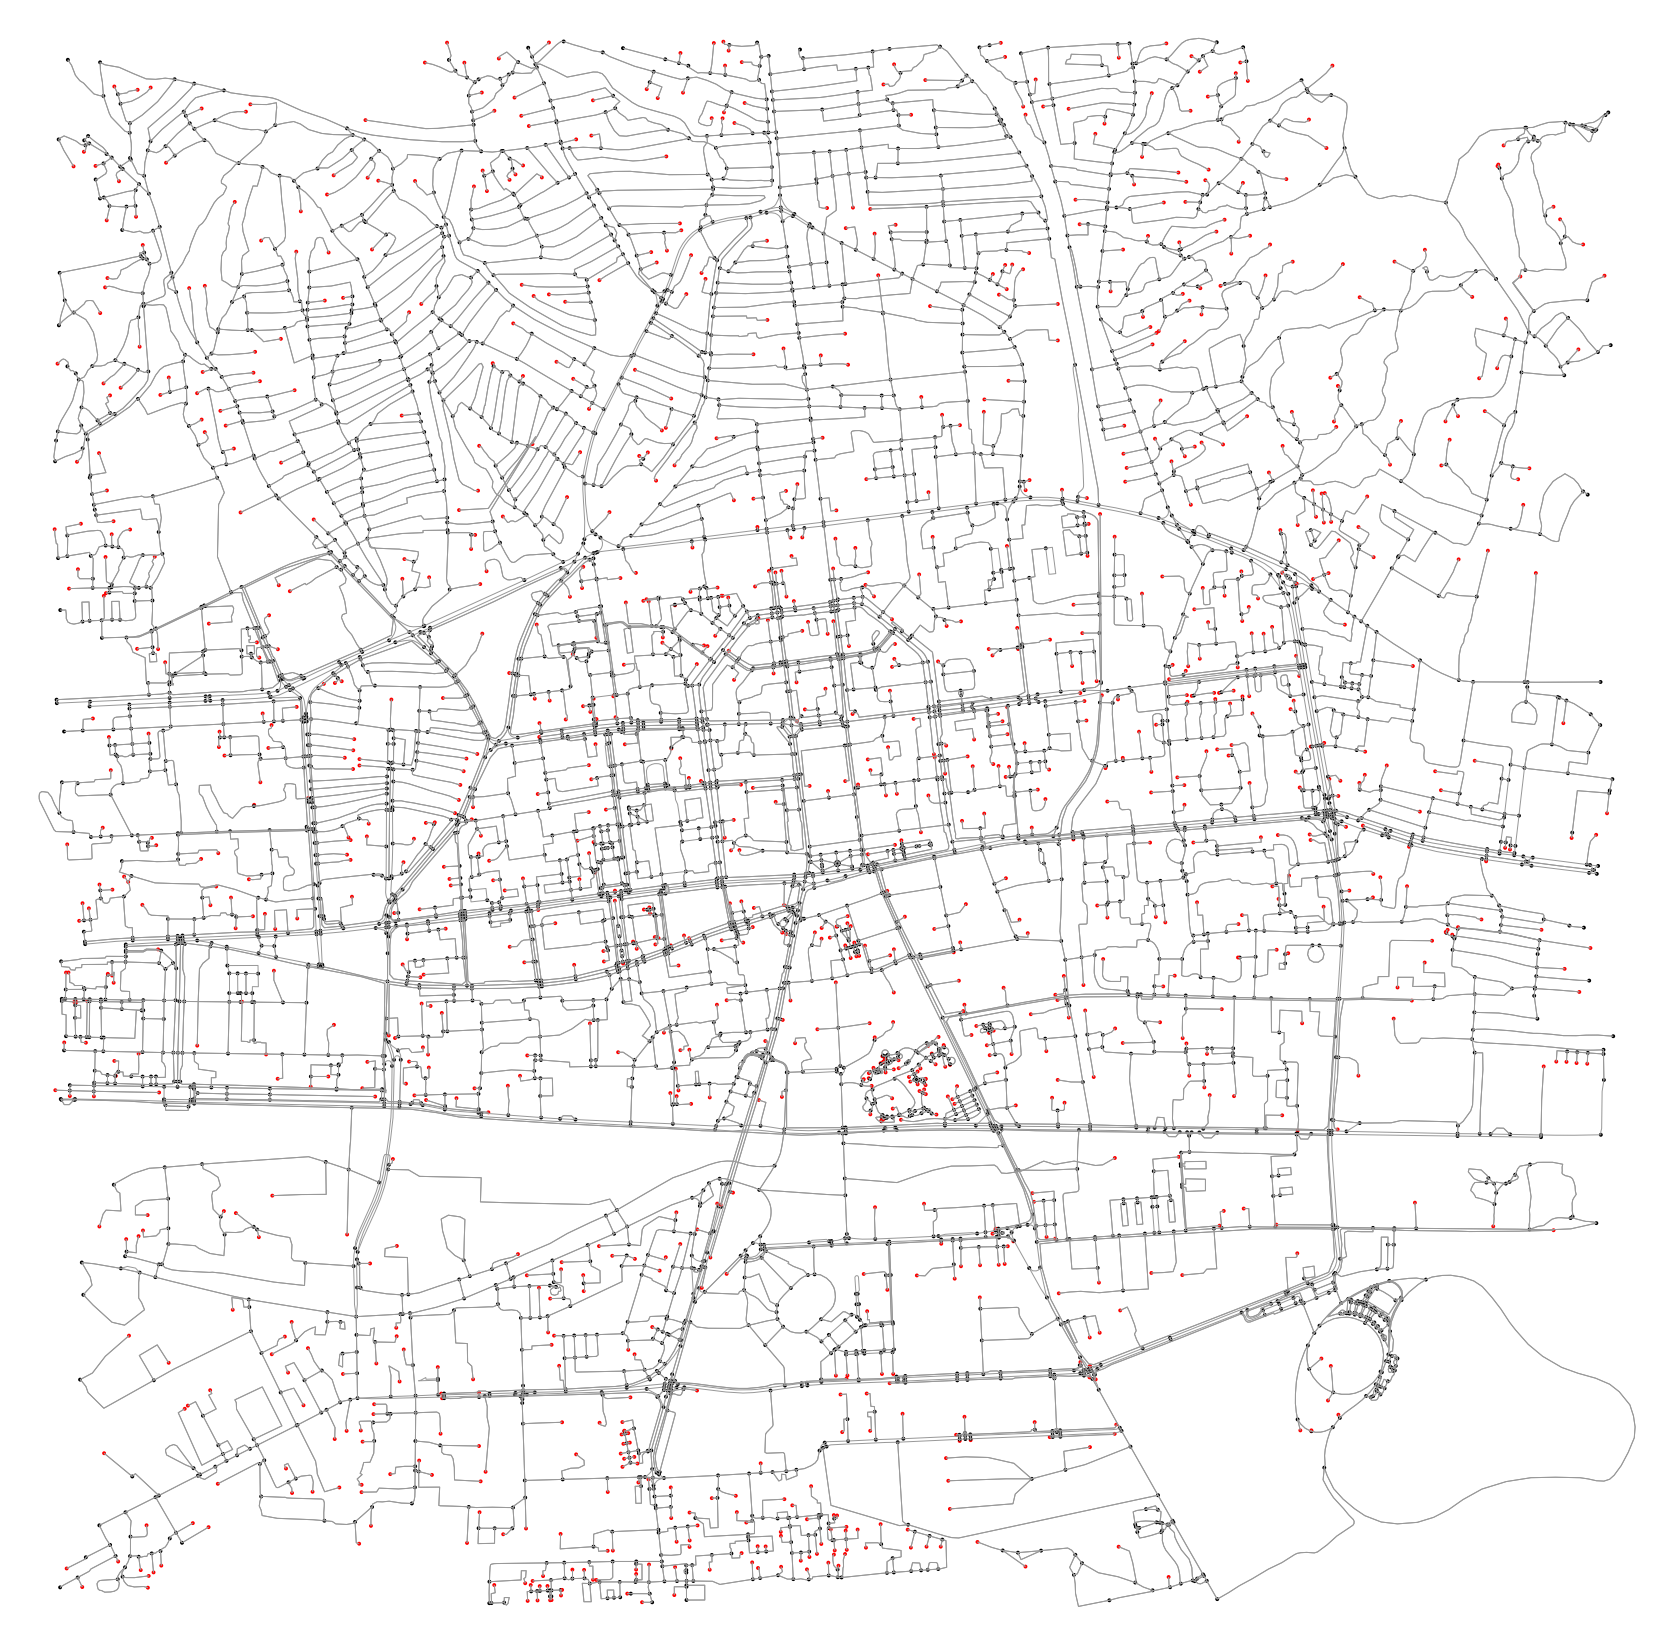

(<Figure size 4320x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f960e01e710>)

In [0]:
culdesacs = [key for key, value in G.graph['streets_per_node'].items() if value==1]
nc = ['r' if node in culdesacs else 'none' for node in G.nodes()]
ox.plot_graph(G, node_color=nc, fig_height=30, fig_width=60)

In [0]:
import folium
m = ox.plot_graph_folium(G, edge_opacity=0.8)
m.save('/content/drive/My Drive/Colab Notebooks/OpenStreet map/osmnx_folium.html')
m

Output hidden; open in https://colab.research.google.com to view.

# Simplify Network

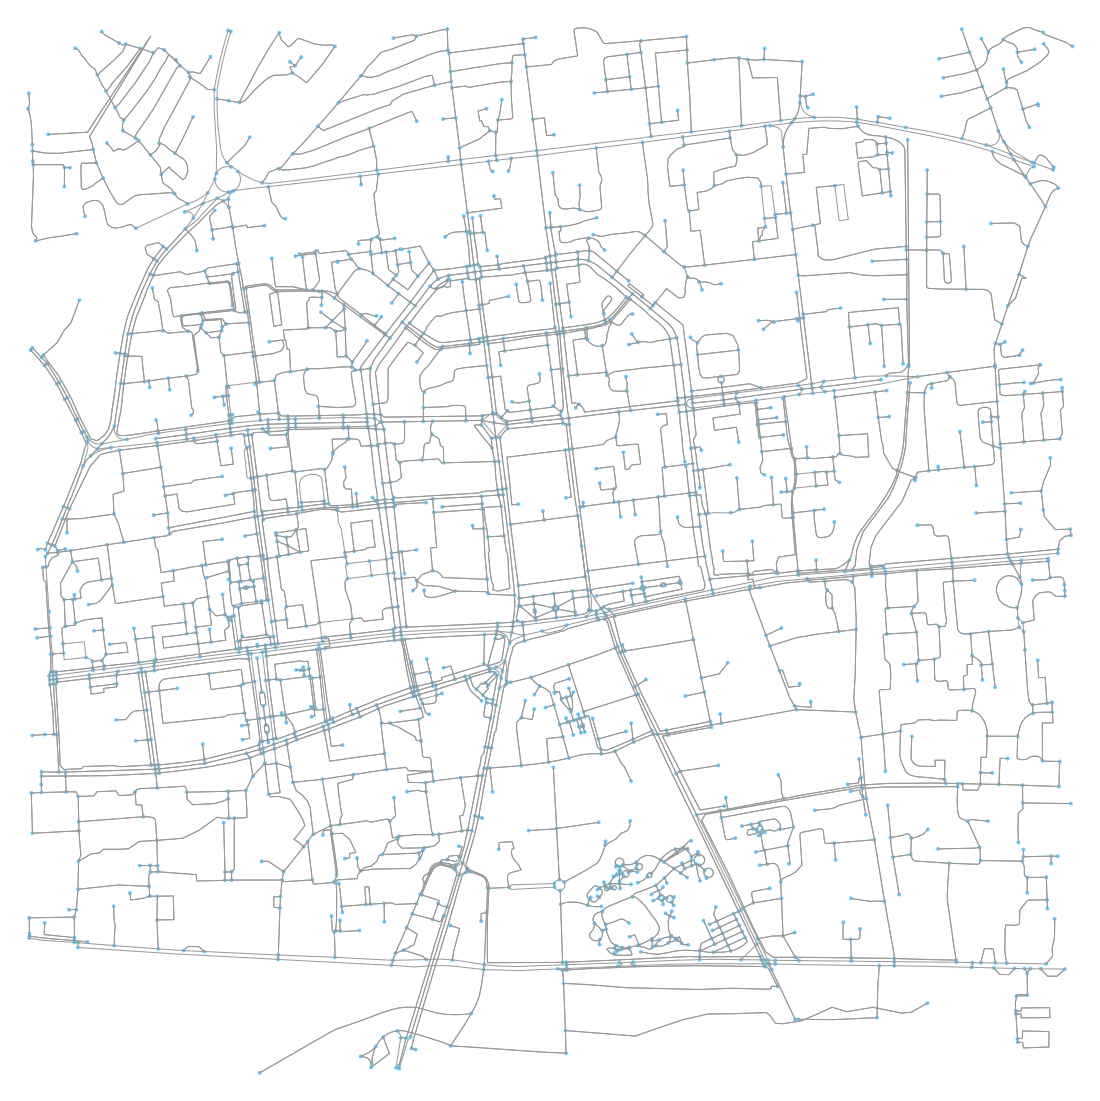

(<Figure size 2880x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9611809898>)

In [0]:
G = ox.graph_from_point((47.91876,106.91773), distance=1500, network_type='all', simplify=True, clean_periphery=True)
ox.plot_graph(G, fig_height=20, fig_width=40)

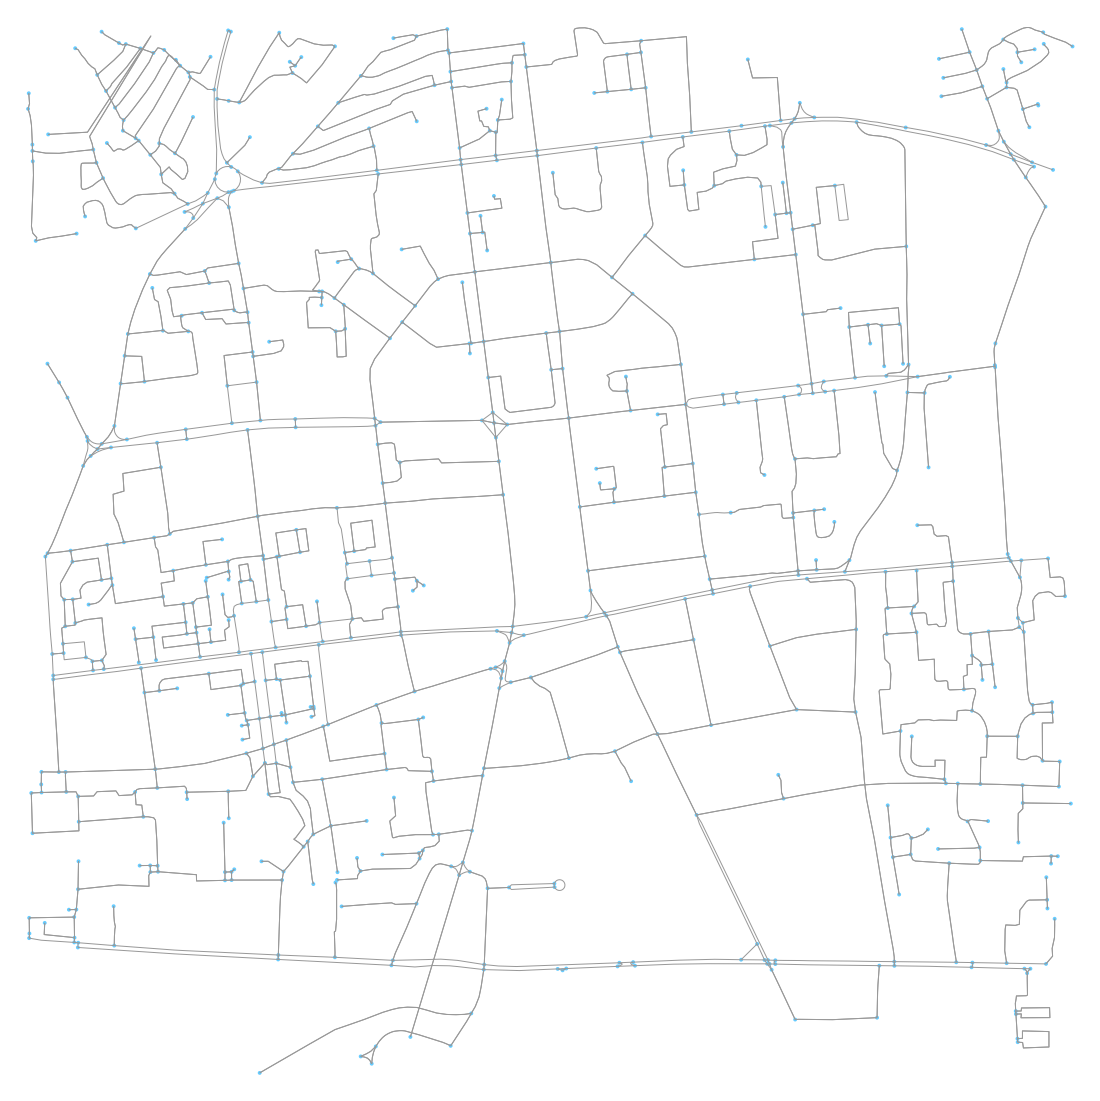

(<Figure size 2880x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9610efa470>)

In [0]:
G = ox.graph_from_point((47.91876,106.91773), distance=1500, network_type='drive', simplify=True, clean_periphery=True)
ox.plot_graph(G, fig_height=20, fig_width=40)

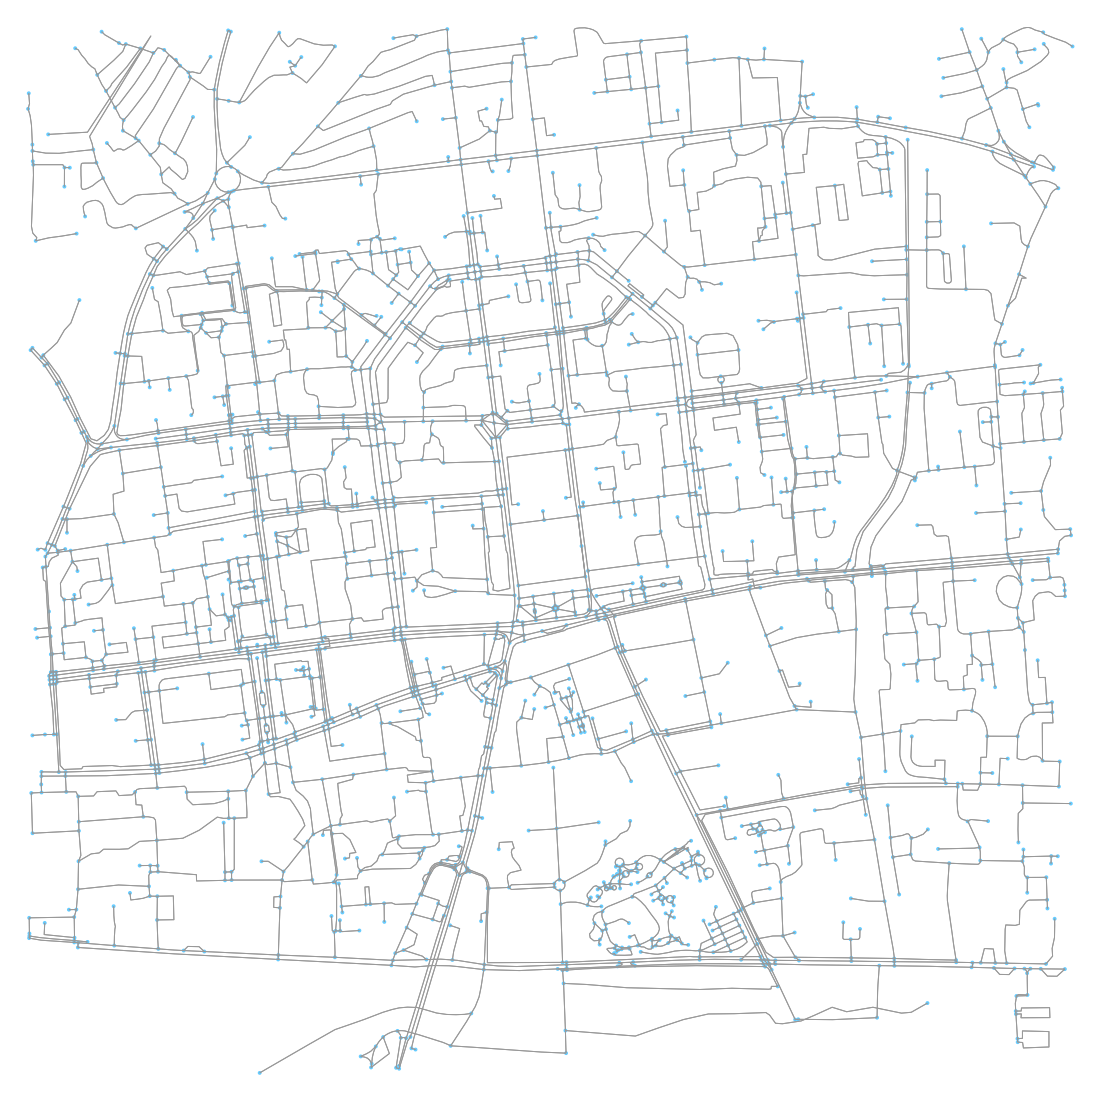

(<Figure size 2880x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9613defe10>)

In [0]:
G = ox.graph_from_point((47.91876,106.91773), distance=1500, network_type='walk', simplify=True)
ox.plot_graph(G, fig_height=20, fig_width=40)